**Load the dataset**

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.varmax import VARMAX

In [ ]:
# Load both datasets and merge them on the date
pce_data = pd.read_csv('/content/PCEPersonalSpending.csv',index_col='Date',parse_dates= True)
money_data = pd.read_csv('/content/M2SLMoneyStock.csv',index_col='Date',parse_dates= True)
print(pce_data.head())
print(money_data.head())

            Spending
Date                
1995-01-01    4851.2
1995-02-01    4850.8
1995-03-01    4885.4
1995-04-01    4890.2
1995-05-01    4933.1
             Money
Date              
1995-01-01  3492.4
1995-02-01  3489.9
1995-03-01  3491.1
1995-04-01  3499.2
1995-05-01  3524.2


In [ ]:
# Merge datasets
data = pd.merge(pce_data, money_data, left_index=True, right_index=True)
data = data.dropna()
data.head()

,Spending,Money
Date,,
1995-01-01,4851.2,3492.4
1995-02-01,4850.8,3489.9
1995-03-01,4885.4,3491.1
1995-04-01,4890.2,3499.2
1995-05-01,4933.1,3524.2


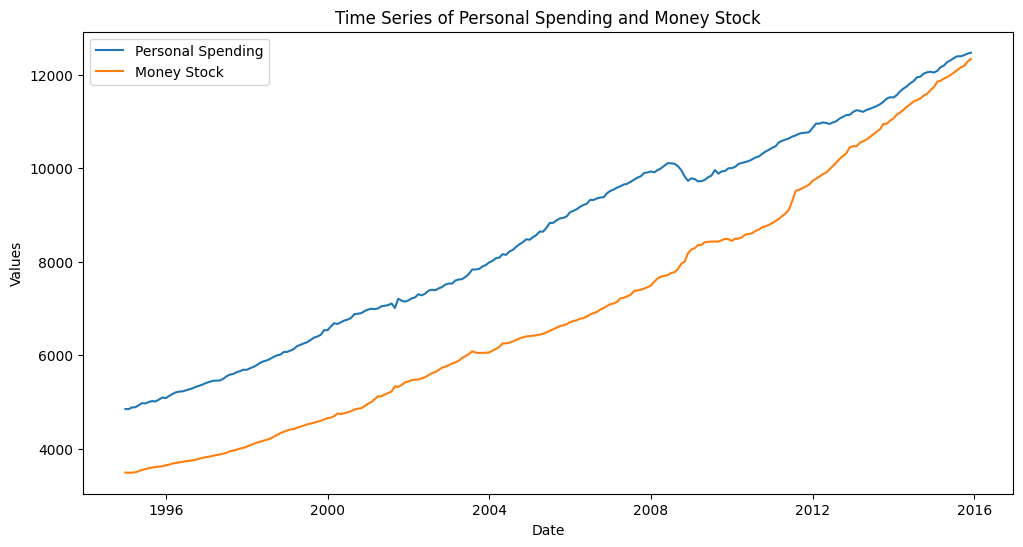

In [ ]:
#Visualize the Time Series
plt.figure(figsize=(12, 6))
plt.plot(data["Spending"], label="Personal Spending")
plt.plot(data["Money"], label="Money Stock")
plt.title("Time Series of Personal Spending and Money Stock")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.show()

##**Check Stationarity of the Data**

In [ ]:
#Perform Augmented Dickey-Fuller (ADF) Test for Stationarity
def adf_test(series, column_name):
    result = adfuller(series)
    print(f"{column_name} ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print(f"{column_name} is stationary.")
    else:
        print(f"{column_name} is non-stationary.")

# Check for both columns
adf_test(data["Spending"], "Personal Spending")
adf_test(data["Money"], "Money Stock")

Personal Spending ADF Statistic: 0.14979608598625482
p-value: 0.9693009944428312
Personal Spending is non-stationary.
Money Stock ADF Statistic: 4.239022425670651
p-value: 1.0
Money Stock is non-stationary.


In [ ]:
# If non-stationary, difference the series
data_diff = data.diff().dropna()

# Verify stationarity after differencing
adf_test(data_diff["Spending"], "Differenced Personal Spending")
adf_test(data_diff["Money"], "Differenced Money Stock")

Differenced Personal Spending ADF Statistic: -7.226973930850647
p-value: 2.0410272592129706e-10
Differenced Personal Spending is stationary.
Differenced Money Stock ADF Statistic: -2.057404049737939
p-value: 0.26198379785112447
Differenced Money Stock is non-stationary.


In [ ]:
# differencing money stock again to make it stationary
data_diff["Money"] = data_diff["Money"].diff().diff()
data_diff = data_diff.dropna()

In [ ]:
# Verify stationarity after differencing
adf_test(data_diff["Spending"], "Differenced Personal Spending")
adf_test(data_diff["Money"], "Differenced Money Stock")

Differenced Personal Spending ADF Statistic: -7.1501389579928505
p-value: 3.1567698637980483e-10
Differenced Personal Spending is stationary.
Differenced Money Stock ADF Statistic: -9.686130480808636
p-value: 1.1692791866599693e-16
Differenced Money Stock is stationary.


In [ ]:
#granger causality test
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(data[['Spending', 'Money']],10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5856  , p=0.4448  , df_denom=248, df_num=1
ssr based chi2 test:   chi2=0.5927  , p=0.4414  , df=1
likelihood ratio test: chi2=0.5920  , p=0.4416  , df=1
parameter F test:         F=0.5856  , p=0.4448  , df_denom=248, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6461  , p=0.5250  , df_denom=245, df_num=2
ssr based chi2 test:   chi2=1.3186  , p=0.5172  , df=2
likelihood ratio test: chi2=1.3151  , p=0.5181  , df=2
parameter F test:         F=0.6461  , p=0.5250  , df_denom=245, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6772  , p=0.1725  , df_denom=242, df_num=3
ssr based chi2 test:   chi2=5.1771  , p=0.1593  , df=3
likelihood ratio test: chi2=5.1240  , p=0.1629  , df=3
parameter F test:         F=1.6772  , p=0.1725  , df_denom=242, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5428  , p=0.1905  

{1: ({'ssr_ftest': (0.5856472492073906, 0.44483490798750147, 248.0, 1),
   'ssr_chi2test': (0.5927316917381252, 0.44136473033673096, 1),
   'lrtest': (0.5920329293303439, 0.44163407253604225, 1),
   'params_ftest': (0.585647249207422, 0.4448349079874907, 248.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.6461006069055323, 0.5249760097173226, 245.0, 2),
   'ssr_chi2test': (1.3185726671541476, 0.5172203255873871, 2),
   'lrtest': (1.3151075779824168, 0.5181172095835902, 2),
   'params_ftest': (0.6461006069060726, 0.5249760097170428, 245.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.6771912113608876, 0.1725136468031675, 242.0, 3),
   'ssr_chi2test': (5.177115020192492, 0.159277925641287, 3),
   'lrtest': (5.124029264218734, 0.16293716313465292, 3),
   'params_ftest': (1.6771912113588527, 0.17251364680360715, 242.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.,

##**Train-Test Split**

In [ ]:
# Step 5: Split the Data (Last 12 months for testing)
train = data_diff[:-12]
test = data_diff[-12:]
print(test.shape)
print(train.shape)

(12, 2)
(235, 2)


##**Fit the VAR Model**

In [ ]:
# Determine Optimal Lag Order
model = VAR(train)
lag_order = model.select_order(maxlags=10)  # Check up to 15 lags
print(lag_order.summary())

# Choose the optimal lag order (e.g., AIC recommended lag)
optimal_lag = lag_order.aic
print(f"Optimal Lag Order: {optimal_lag}")

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        17.59       17.62   4.356e+07       17.60
1        16.80       16.90   1.986e+07       16.84
2        15.97       16.12   8.586e+06       16.03
3        15.63       15.85   6.158e+06       15.72
4        15.43       15.70   5.016e+06       15.54
5        15.22       15.56   4.093e+06       15.36
6        15.08       15.47   3.533e+06       15.24
7        14.95       15.40   3.104e+06       15.13
8        14.88      15.40*   2.909e+06       15.09
9       14.83*       15.41  2.773e+06*      15.07*
10       14.84       15.47   2.778e+06       15.09
--------------------------------------------------
Optimal Lag Order: 9


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# Fit the VAR Model
var_model = VARMAX(train, order=(9,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                             Statespace Model Results                            
Dep. Variable:     ['Spending', 'Money']   No. Observations:                  235
Model:                            VAR(9)   Log Likelihood               -2371.490
                             + intercept   AIC                           4824.981
Date:                   Sun, 26 Jan 2025   BIC                           4966.824
Time:                           07:42:13   HQIC                          4882.165
Sample:                       06-01-1995                                         
                            - 12-01-2014                                         
Covariance Type:                     opg                                         
Ljung-Box (L1) (Q):             0.02, 0.30   Jarque-Bera (JB):       184.89, 571.75
Prob(Q):                        0.90, 0.59   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.47, 6.86   Skew:                     -0.28, -1.20
Prob(H) (t

##**Forecast Future Values**

In [ ]:
# Forecast the Next 12 Periods
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train),end=len(train) + n_forecast-1)
predictions = predict.predicted_mean
predictions.columns=['Spending_predicted','Money_predicted']
predictions

,Spending_predicted,Money_predicted
2015-01-01,38.879854,-206.443952
2015-02-01,27.804052,157.095261
2015-03-01,27.951425,-74.970859
2015-04-01,29.222377,23.433574
2015-05-01,38.828608,-2.007495
2015-06-01,29.351723,-25.072440
2015-07-01,34.887442,40.685001
2015-08-01,33.394717,-22.588120
2015-09-01,23.957669,0.666499
2015-10-01,31.899761,7.104247


<Axes: >

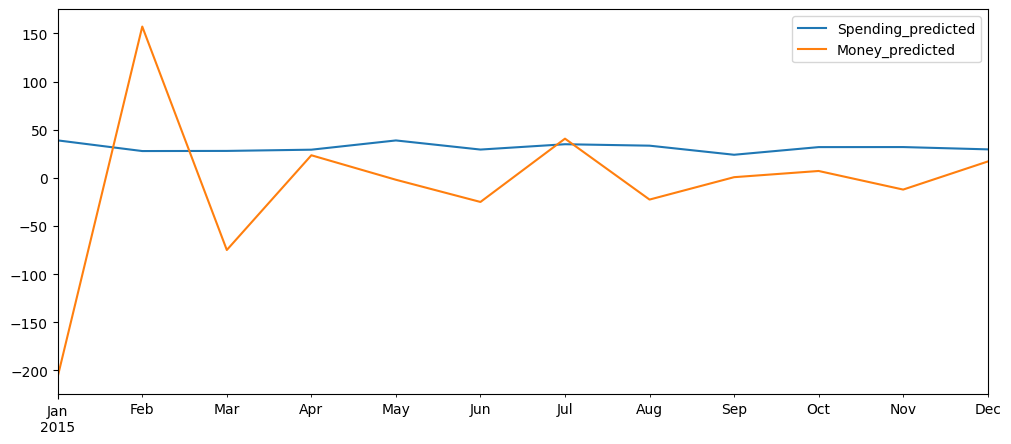

In [ ]:
predictions.plot(figsize=(12,5))

In [ ]:
test_vs_pred=pd.concat([test,predictions],axis=1)

<Axes: >

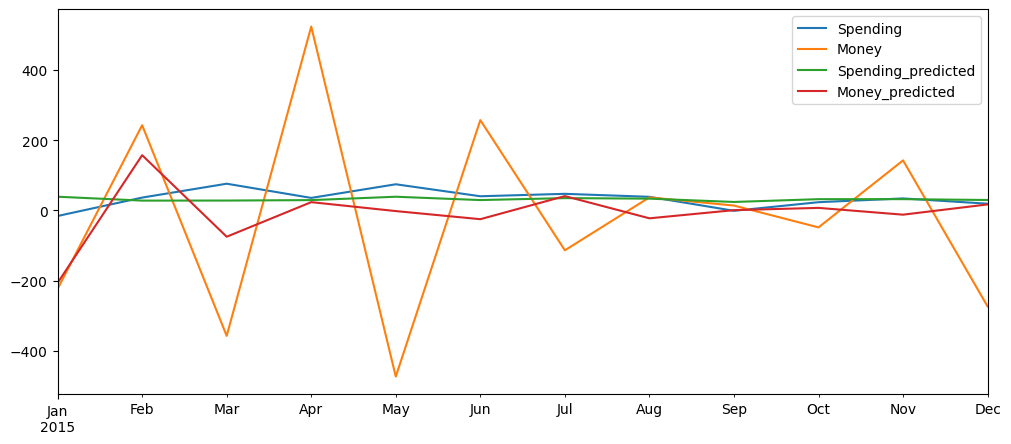

In [ ]:
test_vs_pred.plot(figsize=(12,5))